### Importing libraries

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

### Loading data

In [252]:
netflix_movies = pd.read_csv('data/netflix_titles.csv', delimiter=',', decimal='.', index_col=0, encoding='latin1',  dtype={'listed_in': 'object', 'country': 'object'})

### Data exploration

In [253]:
netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8809 entries, s1 to s8809
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          8809 non-null   object 
 1   title         8809 non-null   object 
 2   director      6175 non-null   object 
 3   cast          7984 non-null   object 
 4   country       7978 non-null   object 
 5   date_added    8799 non-null   object 
 6   release_year  8809 non-null   int64  
 7   rating        8805 non-null   object 
 8   duration      8806 non-null   object 
 9   listed_in     8809 non-null   object 
 10  description   8809 non-null   object 
 11  Unnamed: 12   0 non-null      float64
 12  Unnamed: 13   0 non-null      float64
 13  Unnamed: 14   0 non-null      float64
 14  Unnamed: 15   0 non-null      float64
 15  Unnamed: 16   0 non-null      float64
 16  Unnamed: 17   0 non-null      float64
 17  Unnamed: 18   0 non-null      float64
 18  Unnamed: 19   0 non-null      f

In [254]:
netflix_movies.describe()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
null_counts = netflix_movies.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64


In [256]:
num_rows = len(netflix_movies)
num_rows

8809

### Data cleaning

#### Deleting unnamed columns

In [257]:
# drop unnamed columns
netflix_movies.drop(netflix_movies.columns[netflix_movies.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

In [258]:
# null counts
null_counts = netflix_movies.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


#### Handling missing data

In [259]:
netflix_movies["director"] = netflix_movies["director"].fillna('No data') 
netflix_movies["country"] = netflix_movies["country"].fillna('No data') 
netflix_movies["cast"] = netflix_movies["cast"].fillna('No data') 
netflix_movies.dropna(subset=['date_added','rating','duration'],inplace=True) 

null_counts = netflix_movies.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


#### Converting data types for easier access

##### Split 'cast' and 'listed_in' to list

In [260]:
netflix_movies["cast"] = netflix_movies["cast"].str.split(",")
netflix_movies["cast"] = netflix_movies["cast"].apply(lambda x: [item.strip() for item in x if item.strip() != ''])

In [261]:
netflix_movies["listed_in"] = netflix_movies["listed_in"].str.split(",")
netflix_movies["listed_in"] = netflix_movies["listed_in"].apply(lambda x: [item.strip() for item in x])

In [262]:
netflix_movies.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[No data],United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,No data,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",No data,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,No data,[No data],No data,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,No data,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...


##### Convert 'date_added' to datetime 

In [263]:
netflix_movies['date_added'] = netflix_movies['date_added'].str.strip()
netflix_movies['date_added'] = pd.to_datetime(netflix_movies['date_added'], errors='coerce')
print(netflix_movies['date_added'])

show_id
s1      2021-09-25
s2      2021-09-24
s3      2021-09-24
s4      2021-09-24
s5      2021-09-24
           ...    
s8805   2019-11-01
s8806   2020-01-11
s8807   2019-03-02
s8808   2024-04-05
s8809   2024-04-05
Name: date_added, Length: 8792, dtype: datetime64[ns]


##### Seperating duration of films and TV series
- movies: minutes
- tv show: seasons

In [264]:
duration_minutes_column = []
duration_seasons_column = []

for time in netflix_movies['duration']:
    if time.find('Season') == -1:
        new_time = re.sub('[ min]', '', time)
        duration_minutes_column.append(int(new_time))
        duration_seasons_column.append(None)
    else:
        new_time = re.sub('[ Season]', '', time)
        duration_minutes_column.append(None)
        duration_seasons_column.append(int(new_time))

netflix_movies.rename(columns={'duration':'duration_seasons'}, inplace=True)
netflix_movies['duration_seasons'] = duration_seasons_column
netflix_movies['duration_minutes'] = duration_minutes_column
netflix_movies.head()

,type,title,director,cast,country,date_added,release_year,rating,duration_seasons,listed_in,description,duration_minutes
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[No data],United States,2021-09-25,2020,PG-13,NaN,[Documentaries],"As her father nears the end of his life, filmm...",90.0
s2,TV Show,Blood & Water,No data,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2.0,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",NaN
s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",No data,2021-09-24,2021,TV-MA,1.0,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,NaN
s4,TV Show,Jailbirds New Orleans,No data,[No data],No data,2021-09-24,2021,TV-MA,1.0,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",NaN
s5,TV Show,Kota Factory,No data,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,2021-09-24,2021,TV-MA,2.0,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,NaN


### Dataset after cleaning

In [265]:
netflix_movies.head()

,type,title,director,cast,country,date_added,release_year,rating,duration_seasons,listed_in,description,duration_minutes
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[No data],United States,2021-09-25,2020,PG-13,NaN,[Documentaries],"As her father nears the end of his life, filmm...",90.0
s2,TV Show,Blood & Water,No data,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2.0,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",NaN
s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",No data,2021-09-24,2021,TV-MA,1.0,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,NaN
s4,TV Show,Jailbirds New Orleans,No data,[No data],No data,2021-09-24,2021,TV-MA,1.0,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",NaN
s5,TV Show,Kota Factory,No data,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,2021-09-24,2021,TV-MA,2.0,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,NaN


In [266]:
netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8792 entries, s1 to s8809
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              8792 non-null   object        
 1   title             8792 non-null   object        
 2   director          8792 non-null   object        
 3   cast              8792 non-null   object        
 4   country           8792 non-null   object        
 5   date_added        8792 non-null   datetime64[ns]
 6   release_year      8792 non-null   int64         
 7   rating            8792 non-null   object        
 8   duration_seasons  2665 non-null   float64       
 9   listed_in         8792 non-null   object        
 10  description       8792 non-null   object        
 11  duration_minutes  6127 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 892.9+ KB


In [267]:
null_counts = netflix_movies.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
type                   0
title                  0
director               0
cast                   0
country                0
date_added             0
release_year           0
rating                 0
duration_seasons    6127
listed_in              0
description            0
duration_minutes    2665
dtype: int64


## Feature engineering

### Adding columns for more data

##### How old is the Movie

In [268]:
current_year = datetime.now().year
netflix_movies['how_old'] = (int(current_year)-netflix_movies['release_year'])

netflix_movies['how_old']

show_id
s1        4
s2        3
s3        3
s4        3
s5        3
         ..
s8805    15
s8806    18
s8807     9
s8808     0
s8809    10
Name: how_old, Length: 8792, dtype: int64

##### Difference betweeen year released and year added

In [269]:
netflix_movies['added_delay'] = (pd.to_datetime(netflix_movies['date_added'], errors='coerce').dt.year-netflix_movies['release_year'])

netflix_movies['added_delay']

show_id
s1        1
s2        0
s3        0
s4        0
s5        0
         ..
s8805    10
s8806    14
s8807     4
s8808     0
s8809    10
Name: added_delay, Length: 8792, dtype: int64

## Analysis

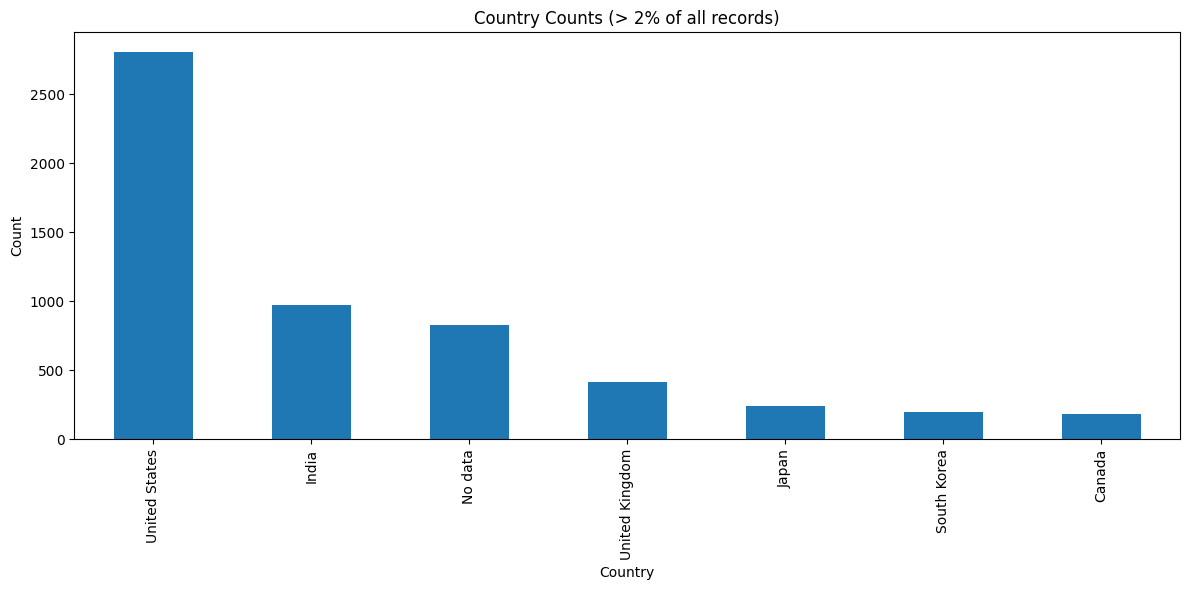

In [270]:
# Count the number of occurrences for each country
country_counts = netflix_movies['country'].explode().value_counts()

# Calculate the total number of records
total_records = netflix_movies.shape[0]

# Filter the countries with more than 2% of all records
top_countries = country_counts[country_counts / total_records > 0.02].index

# Create a bar chart for the top countries
plt.figure(figsize=(12, 6))
country_counts[top_countries].plot(kind='bar')
plt.title('Country Counts (> 2% of all records)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

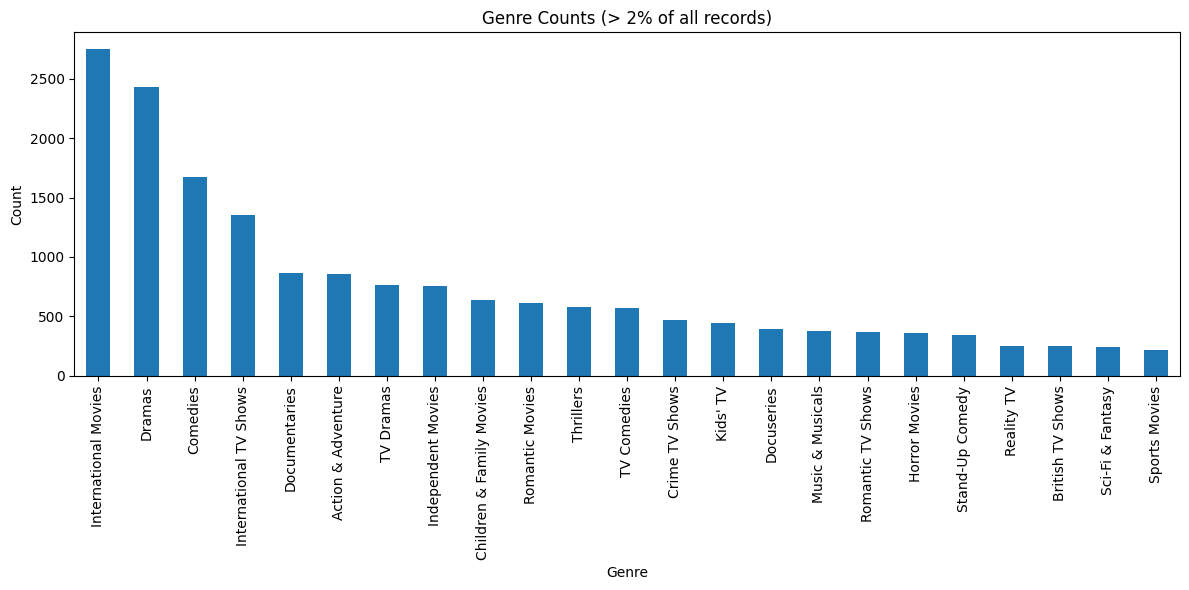

In [271]:
# Count the number of occurrences for each genre
genre_counts = netflix_movies['listed_in'].explode().value_counts()

# Calculate the total number of records
total_records = netflix_movies.shape[0]

# Filter the genres with more than 2% of all records
top_genres = genre_counts[genre_counts / total_records > 0.02].index

# Create a bar chart for the top genres
plt.figure(figsize=(12, 6))
genre_counts[top_genres].plot(kind='bar')
plt.title('Genre Counts (> 2% of all records)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

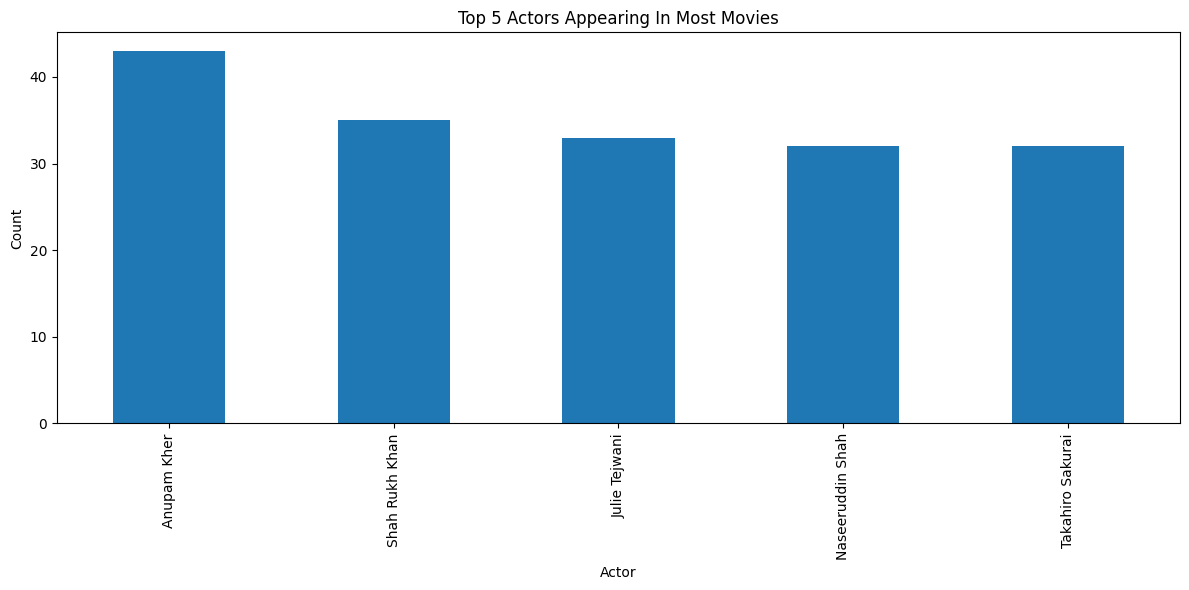

In [272]:
# Count the number of occurrences for each genre
actor_counts = netflix_movies['cast'].explode().value_counts()
actor_counts = actor_counts[actor_counts.index != 'No data']

top_actors = actor_counts.head(5)

# Create a bar plot for the top 5 actors
top_actors.plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 Actors Appearing In Most Movies')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

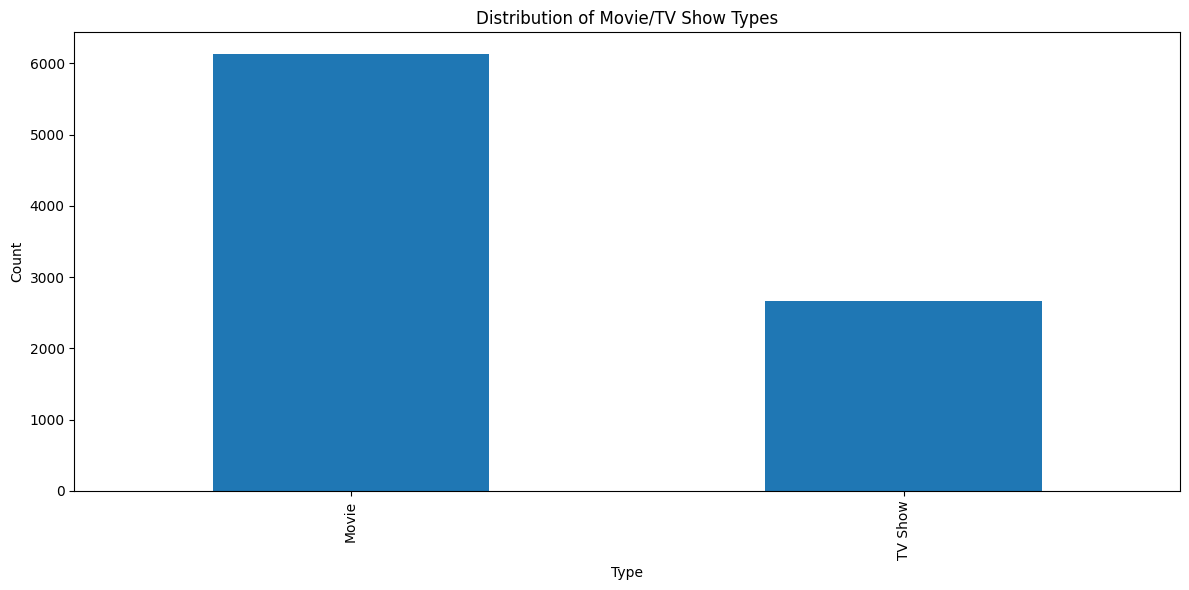

In [273]:
# Count the occurrences of each 'type' value
type_counts = netflix_movies['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar')
plt.title('Distribution of Movie/TV Show Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

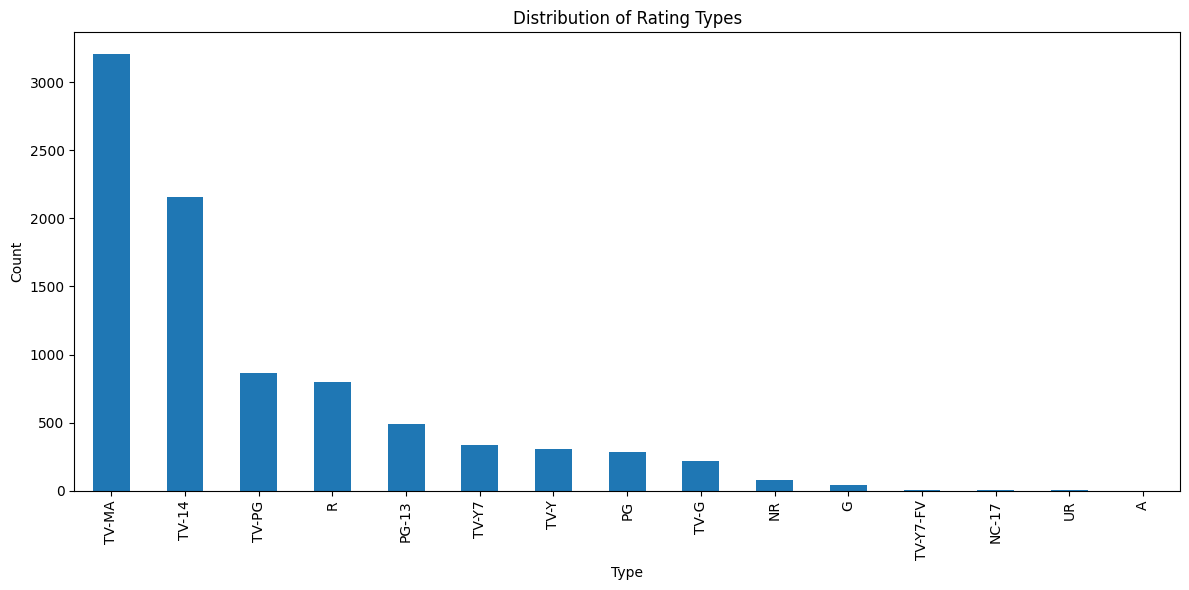

In [274]:
# Count the occurrences of each 'type' value
rating_counts = netflix_movies['rating'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar')
plt.title('Distribution of Rating Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()